<a href="https://colab.research.google.com/github/manahilnasim/HelloHarmony-Music-Recommendation/blob/main/Data_Cleaning_%26_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Inspection & Initial Observations


Read the files with the appropriate delimiter

In [59]:
import pandas as pd

# Define the correct file paths
file_paths = {
    "artists": '/content/datasets/artists.csv',
    "tags": '/content/datasets/tags.csv',
    "user_artists": '/content/datasets/user_artists.csv',
    "user_taggedartists_timestamps": '/content/datasets/user_taggedartists-timestamps.csv',
    "user_friends": '/content/datasets/user_friends.csv'
}

# Load the datasets correctly and remove the header row
artists = pd.read_csv(file_paths["artists"], delimiter=',', skiprows=1, names=['id', 'name', 'url', 'pictureURL']).iloc[1:]
tags = pd.read_csv(file_paths["tags"], delimiter=',', skiprows=1, names=['tagID', 'tagValue']).iloc[1:]
user_artists = pd.read_csv(file_paths["user_artists"], delimiter=',', skiprows=1, names=['userID', 'artistID', 'weight']).iloc[1:]
user_taggedartists = pd.read_csv(file_paths["user_taggedartists_timestamps"], delimiter=',', skiprows=1, names=['userID', 'artistID', 'tagID', 'timestamp']).iloc[1:]
user_friends = pd.read_csv(file_paths["user_friends"], delimiter=',', skiprows=1, names=['userID', 'friendID']).iloc[1:]

# Display the first few rows of each dataset to confirm loading
print("Artists:\n", artists.head())
print("Tags:\n", tags.head())
print("User Artists:\n", user_artists.head())
print("User Tagged Artists:\n", user_taggedartists.head())
print("User Friends:\n", user_friends.head())

Artists:
   id               name                                         url  \
1  1       MALICE MIZER       http://www.last.fm/music/MALICE+MIZER   
2  2    Diary of Dreams    http://www.last.fm/music/Diary+of+Dreams   
3  3  Carpathian Forest  http://www.last.fm/music/Carpathian+Forest   
4  4       Moi dix Mois       http://www.last.fm/music/Moi+dix+Mois   
5  5        Bella Morte        http://www.last.fm/music/Bella+Morte   

                                          pictureURL  
1    http://userserve-ak.last.fm/serve/252/10808.jpg  
2  http://userserve-ak.last.fm/serve/252/3052066.jpg  
3  http://userserve-ak.last.fm/serve/252/40222717...  
4  http://userserve-ak.last.fm/serve/252/54697835...  
5  http://userserve-ak.last.fm/serve/252/14789013...  
Tags:
   tagID           tagValue
1     1              metal
2     2  alternative metal
3     3          goth rock
4     4        black metal
5     5        death metal
User Artists:
   userID artistID weight
1      2       51  13883

<ipython-input-59-29b5544ebef1>:16: DtypeWarning: Columns (0,1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  user_taggedartists = pd.read_csv(file_paths["user_taggedartists_timestamps"], delimiter=',', skiprows=1, names=['userID', 'artistID', 'tagID', 'timestamp']).iloc[1:]


# Data Cleaning and Preparation


Check for and Handle Missing Values


In [60]:
# Convert data types
user_artists['userID'] = user_artists['userID'].astype(int)
user_artists['artistID'] = user_artists['artistID'].astype(int)
user_artists['weight'] = user_artists['weight'].astype(int)

user_taggedartists['userID'] = user_taggedartists['userID'].astype(int)
user_taggedartists['artistID'] = user_taggedartists['artistID'].astype(int)
user_taggedartists['tagID'] = user_taggedartists['tagID'].astype(int)
user_taggedartists['timestamp'] = pd.to_datetime(user_taggedartists['timestamp'], unit='ms')

user_friends['userID'] = user_friends['userID'].astype(int)
user_friends['friendID'] = user_friends['friendID'].astype(int)

# Check for missing values
print("Missing values in artists:\n", artists.isnull().sum())
print("Missing values in tags:\n", tags.isnull().sum())
print("Missing values in user_artists:\n", user_artists.isnull().sum())
print("Missing values in user_taggedartists:\n", user_taggedartists.isnull().sum())
print("Missing values in user_friends:\n", user_friends.isnull().sum())


Missing values in artists:
 id              0
name            0
url             0
pictureURL    444
dtype: int64
Missing values in tags:
 tagID       0
tagValue    0
dtype: int64
Missing values in user_artists:
 userID      0
artistID    0
weight      0
dtype: int64
Missing values in user_taggedartists:
 userID       0
artistID     0
tagID        0
timestamp    0
dtype: int64
Missing values in user_friends:
 userID      0
friendID    0
dtype: int64


<ipython-input-60-6bfb65d97e07>:9: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  user_taggedartists['timestamp'] = pd.to_datetime(user_taggedartists['timestamp'], unit='ms')


Identify and Remove Duplicates

In [61]:
# Remove duplicates
artists = artists.drop_duplicates()
tags = tags.drop_duplicates()
user_artists = user_artists.drop_duplicates()
user_taggedartists = user_taggedartists.drop_duplicates()
user_friends = user_friends.drop_duplicates()

# Display the cleaned data
print("Cleaned Artists:\n", artists.head())
print("Cleaned Tags:\n", tags.head())
print("Cleaned User Artists:\n", user_artists.head())
print("Cleaned User Tagged Artists:\n", user_taggedartists.head())
print("Cleaned User Friends:\n", user_friends.head())

Cleaned Artists:
   id               name                                         url  \
1  1       MALICE MIZER       http://www.last.fm/music/MALICE+MIZER   
2  2    Diary of Dreams    http://www.last.fm/music/Diary+of+Dreams   
3  3  Carpathian Forest  http://www.last.fm/music/Carpathian+Forest   
4  4       Moi dix Mois       http://www.last.fm/music/Moi+dix+Mois   
5  5        Bella Morte        http://www.last.fm/music/Bella+Morte   

                                          pictureURL  
1    http://userserve-ak.last.fm/serve/252/10808.jpg  
2  http://userserve-ak.last.fm/serve/252/3052066.jpg  
3  http://userserve-ak.last.fm/serve/252/40222717...  
4  http://userserve-ak.last.fm/serve/252/54697835...  
5  http://userserve-ak.last.fm/serve/252/14789013...  
Cleaned Tags:
   tagID           tagValue
1     1              metal
2     2  alternative metal
3     3          goth rock
4     4        black metal
5     5        death metal
Cleaned User Artists:
    userID  artistID  weig

Data Preprocessing

In [62]:
# Handle missing values in pictureURL by filling with a placeholder
artists['pictureURL'].fillna('no_image_available', inplace=True)

# Normalize the 'weight' column in user_artists dataset
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
user_artists['weight_normalized'] = scaler.fit_transform(user_artists[['weight']])

# Create new feature: year from timestamp in user_taggedartists dataset
user_taggedartists['year'] = user_taggedartists['timestamp'].dt.year

# Display the processed data
print("Processed Artists:\n", artists.head())
print("Processed User Artists:\n", user_artists.head())
print("Processed User Tagged Artists:\n", user_taggedartists.head())

Processed Artists:
   id               name                                         url  \
1  1       MALICE MIZER       http://www.last.fm/music/MALICE+MIZER   
2  2    Diary of Dreams    http://www.last.fm/music/Diary+of+Dreams   
3  3  Carpathian Forest  http://www.last.fm/music/Carpathian+Forest   
4  4       Moi dix Mois       http://www.last.fm/music/Moi+dix+Mois   
5  5        Bella Morte        http://www.last.fm/music/Bella+Morte   

                                          pictureURL  
1    http://userserve-ak.last.fm/serve/252/10808.jpg  
2  http://userserve-ak.last.fm/serve/252/3052066.jpg  
3  http://userserve-ak.last.fm/serve/252/40222717...  
4  http://userserve-ak.last.fm/serve/252/54697835...  
5  http://userserve-ak.last.fm/serve/252/14789013...  
Processed User Artists:
    userID  artistID  weight  weight_normalized
1       2        51   13883           0.039360
2       2        52   11690           0.033142
3       2        53   11351           0.032181
4       2 

# Implementing Feature Engineering


User Features

In [77]:
# Enhanced User Features
# Listening Time Features
user_listening_time = user_taggedartists.groupby('userID').agg(
    avg_listening_count_per_session=('tagID', 'count'),  # Assuming each tag represents a session
    peak_listening_hour=('timestamp', lambda x: x.dt.hour.mode()[0])
).reset_index()

# Engagement Features
user_engagement = user_taggedartists.groupby('userID').agg(
    total_interactions=('artistID', 'count'),
    tag_diversity=('tagID', 'nunique')
).reset_index()

# Recency Features
current_time = pd.Timestamp.now()
user_recency = user_taggedartists.groupby('userID').agg(
    time_since_last_interaction=('timestamp', lambda x: (current_time - x.max()).days),
    avg_time_between_interactions=('timestamp', lambda x: (x.max() - x.min()).days / (x.nunique() - 1) if x.nunique() > 1 else 0)
).reset_index()

# Merge all user features
user_data = pd.merge(user_data, user_listening_time, on='userID', how='left')
user_data = pd.merge(user_data, user_engagement, on='userID', how='left')
user_data = pd.merge(user_data, user_recency, on='userID', how='left')

print("Enhanced User Data:\n", user_data.head())

Enhanced User Data:
    userID  total_listening_count  unique_artists_listened  \
0       2                 168737                       50   
1       3                  20501                       50   
2       4                  26930                       50   
3       5                  13159                       50   
4       6                   1011                       50   

   avg_listening_count_per_artist  num_friends  unique_tags_used  \
0                         3374.74           13                26   
1                          410.02            7                28   
2                          538.60           10                31   
3                          263.18            7                 6   
4                           20.22            5                14   

   avg_listening_count_per_session  peak_listening_hour  total_interactions  \
0                               45                   22                  45   
1                               56           

Artist Features

In [78]:
# Enhanced Artist Features
# Popularity Features
artist_popularity_trend = user_taggedartists.groupby(['artistID', 'year']).size().groupby('artistID').pct_change().reset_index(name='growth_rate')
artist_popularity = artist_popularity_trend.groupby('artistID').agg(
    avg_growth_rate=('growth_rate', 'mean')
).reset_index()

# Diversity Features
artist_diversity = user_artists.groupby('artistID').agg(
    listener_diversity=('weight', lambda x: 1 - (x.value_counts(normalize=True) ** 2).sum()),  # Gini coefficient for diversity
    unique_tags=('artistID', 'nunique')
).reset_index()

# Tag Influence
tag_influence = user_taggedartists.groupby('tagID')['artistID'].apply(lambda x: user_artists[user_artists['artistID'].isin(x)]['weight'].mean()).reset_index(name='avg_listening_count')
artist_tag_influence = pd.merge(user_taggedartists, tag_influence, on='tagID', how='left').groupby('artistID')['avg_listening_count'].max().reset_index(name='most_influential_tag')

# Merge all artist features
artist_data = pd.merge(artist_data, artist_popularity, on='artistID', how='left')
artist_data = pd.merge(artist_data, artist_diversity, on='artistID', how='left')
artist_data = pd.merge(artist_data, artist_tag_influence, on='artistID', how='left')

print("Enhanced Artist Data:\n", artist_data.head())

Enhanced Artist Data:
    artistID  total_listening_count  unique_users_listened  \
0         1                    771                      3   
1         2                   8012                     12   
2         3                    775                      3   
3         4                    563                      2   
4         5                    913                      2   

   avg_listening_count_per_user  num_tags  most_frequent_tag  avg_growth_rate  \
0                    257.000000      15.0              139.0         1.120370   
1                    667.666667      27.0              575.0         0.464545   
2                    258.333333       9.0                4.0        -0.428571   
3                    281.500000      22.0              139.0         2.462963   
4                    456.500000       7.0              575.0         0.666667   

   listener_diversity  unique_tags  most_influential_tag  
0            0.666667            1           1284.998480  
1    

Tag Features

In [80]:
# Number of unique tags used by each user
user_tags = user_taggedartists.groupby('userID')['tagID'].nunique().reset_index()
user_tags.columns = ['userID', 'unique_tags_used']

# Most frequent tag for each artist
artist_tags = user_taggedartists.groupby('artistID')['tagID'].apply(lambda x: x.value_counts().idxmax()).reset_index()
artist_tags.columns = ['artistID', 'most_frequent_tag']

# Number of distinct users who used each tag
tag_users_count = user_taggedartists.groupby('tagID')['userID'].nunique().reset_index()
tag_users_count.columns = ['tagID', 'num_users']

print("User Tags:\n", user_tags.head())
print("Artist Tags:\n", artist_tags.head())
print("Tag Users Count:\n", tag_users_count.head())

User Tags:
    userID  unique_tags_used
0       2                26
1       3                28
2       4                31
3       5                 6
4       6                14
Artist Tags:
    artistID  most_frequent_tag
0         1                139
1         2                575
2         3                  4
3         4                139
4         5                575
Tag Users Count:
    tagID  num_users
0      1        237
1      2         62
2      3          5
3      4         55
4      5         96


Merge All Features


In [81]:
# Merge User Features, Artist Features, and Tag Features
# Here we assume that we will use user_data and artist_data for recommendation
# Depending on the algorithm, we may use these merged datasets or keep them separate

# Example of merging user data with user-artist interaction data
user_artist_interactions = pd.merge(user_artists, user_data, on='userID', how='left')
user_artist_interactions = pd.merge(user_artist_interactions, artist_data, on='artistID', how='left')

print("User-Artist Interactions with Enhanced Features:\n", user_artist_interactions.head())

User-Artist Interactions with Enhanced Features:
    userID  artistID  weight  weight_normalized  total_listening_count_x  \
0       2        51   13883           0.039360                   168737   
1       2        52   11690           0.033142                   168737   
2       2        53   11351           0.032181                   168737   
3       2        54   10300           0.029201                   168737   
4       2        55    8983           0.025467                   168737   

   unique_artists_listened  avg_listening_count_per_artist  num_friends  \
0                       50                         3374.74           13   
1                       50                         3374.74           13   
2                       50                         3374.74           13   
3                       50                         3374.74           13   
4                       50                         3374.74           13   

   unique_tags_used  avg_listening_count_per_ses

#Exploratory Data Analysis (EDA)

Descriptive Statistics

In [86]:
# Descriptive statistics for user_artists
user_artists.describe()

# Descriptive statistics for user_taggedartists
user_taggedartists.describe()

,userID,artistID,tagID,timestamp,year
count,186479.000000,186479.000000,186479.000000,186479,186479.000000
mean,1035.600137,4375.845328,1439.582913,2009-04-08 15:15:43.945617664,2008.724049
min,2.000000,1.000000,1.000000,1956-05-31 23:00:09.856000,1956.000000
25%,488.000000,686.000000,79.000000,2008-04-30 22:00:40.192000,2008.000000
50%,1021.000000,2203.000000,195.000000,2009-05-31 22:00:19.712000,2009.000000
75%,1624.000000,6714.000000,887.000000,2010-05-31 21:59:02.912000,2010.000000
max,2100.000000,18744.000000,12647.000000,2011-05-09 11:44:57.468000,2011.000000
std,622.461272,4897.789595,2775.340279,NaN,1.399916


Distributions of Key Features

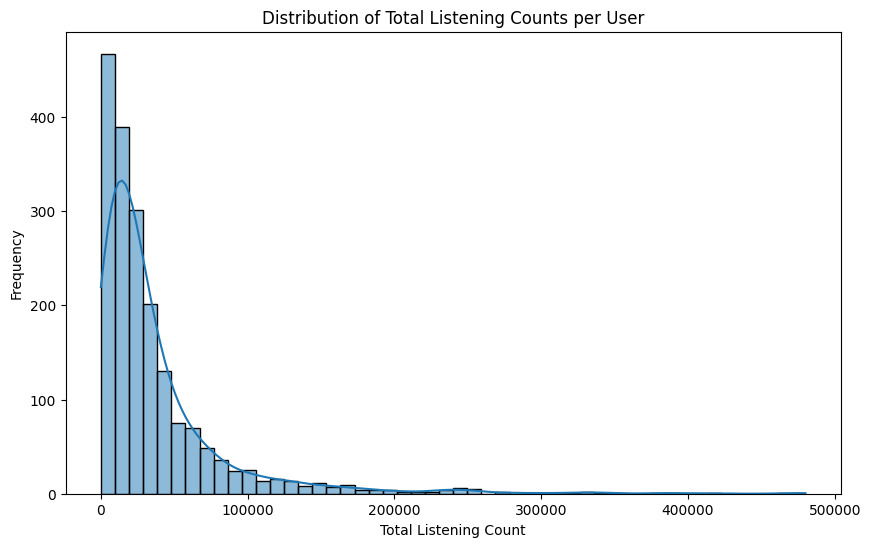

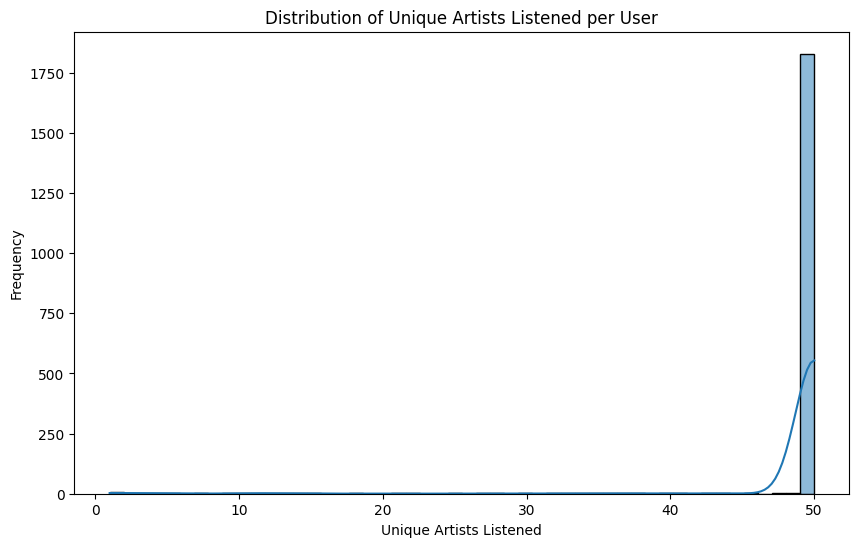

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Total Listening Counts
plt.figure(figsize=(10, 6))
sns.histplot(user_data['total_listening_count'], bins=50, kde=True)
plt.title('Distribution of Total Listening Counts per User')
plt.xlabel('Total Listening Count')
plt.ylabel('Frequency')
plt.show()

# Distribution of Unique Artists Listened
plt.figure(figsize=(10, 6))
sns.histplot(user_data['unique_artists_listened'], bins=50, kde=True)
plt.title('Distribution of Unique Artists Listened per User')
plt.xlabel('Unique Artists Listened')
plt.ylabel('Frequency')
plt.show()

Identify Correlations Between Features

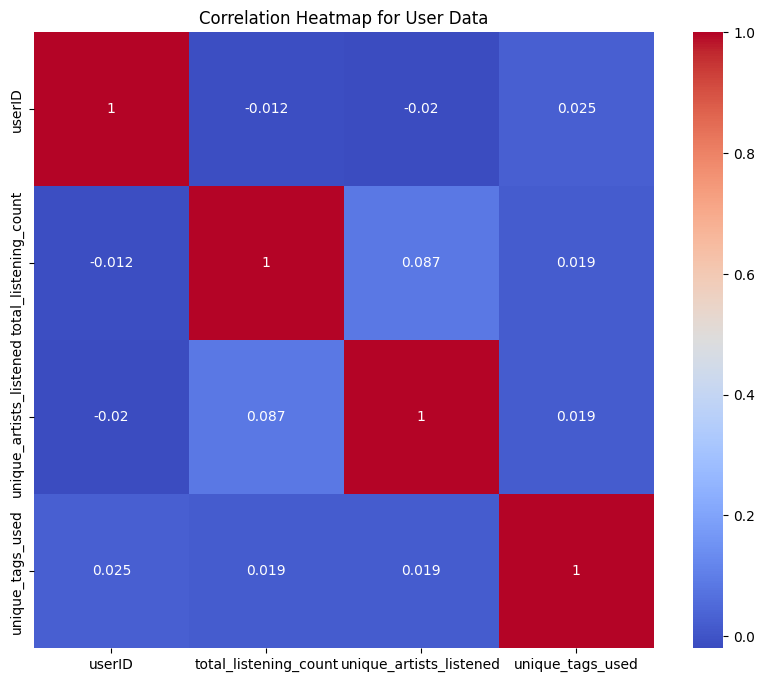

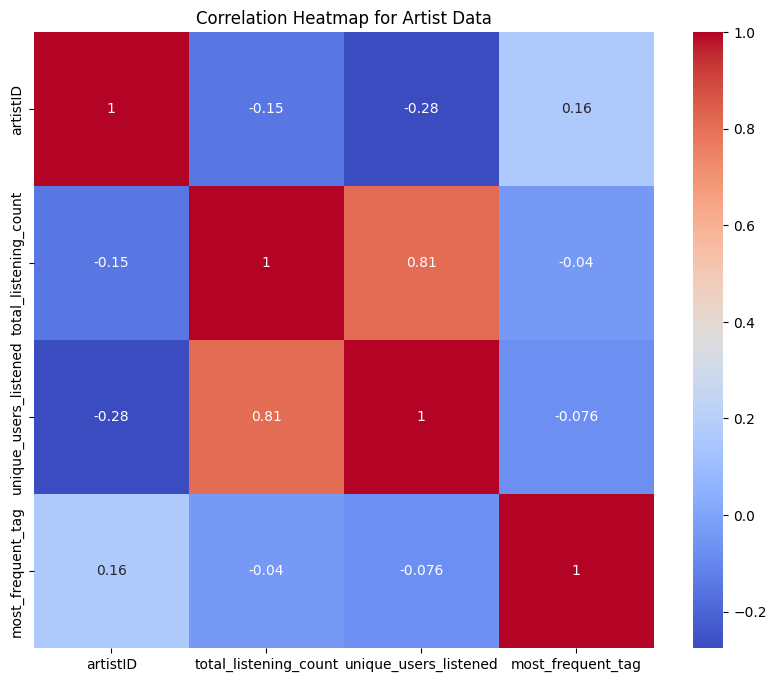

In [65]:
# Correlation matrix for user data
plt.figure(figsize=(10, 8))
sns.heatmap(user_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for User Data')
plt.show()

# Correlation matrix for artist data
plt.figure(figsize=(10, 8))
sns.heatmap(artist_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for Artist Data')
plt.show()

 Visualize User Activity and Artist Popularity

In [82]:
# Create placeholder user names
user_data['user_name'] = 'User_' + user_data['userID'].astype(str)

In [84]:
# Convert artistID in artist_data and id in artists to the same type
artist_data['artistID'] = artist_data['artistID'].astype(int)
artists['id'] = artists['id'].astype(int)

# Merge artist names into artist_data
artist_data = pd.merge(artist_data, artists[['id', 'name']], left_on='artistID', right_on='id', how='left').drop(columns=['id'])

# Create placeholder user names
user_data['user_name'] = 'User_' + user_data['userID'].astype(str)

# Display the updated dataframes
print("Updated User Data with User Names:\n", user_data.head())
print("Updated Artist Data with Artist Names:\n", artist_data.head())

Updated User Data with User Names:
    userID  total_listening_count  unique_artists_listened  \
0       2                 168737                       50   
1       3                  20501                       50   
2       4                  26930                       50   
3       5                  13159                       50   
4       6                   1011                       50   

   avg_listening_count_per_artist  num_friends  unique_tags_used  \
0                         3374.74           13                26   
1                          410.02            7                28   
2                          538.60           10                31   
3                          263.18            7                 6   
4                           20.22            5                14   

   avg_listening_count_per_session  peak_listening_hour  total_interactions  \
0                               45                   22                  45   
1                             

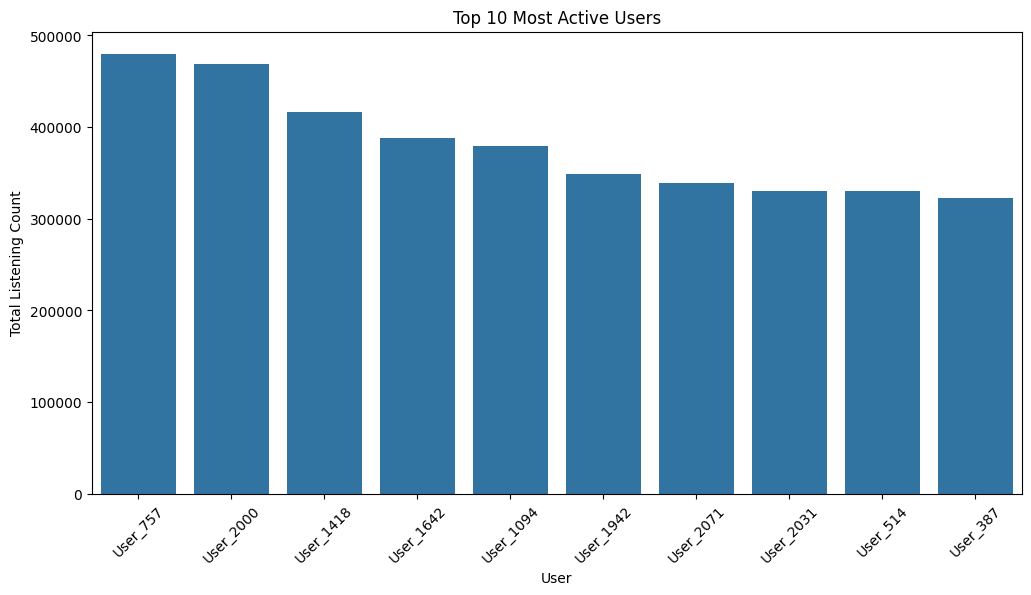

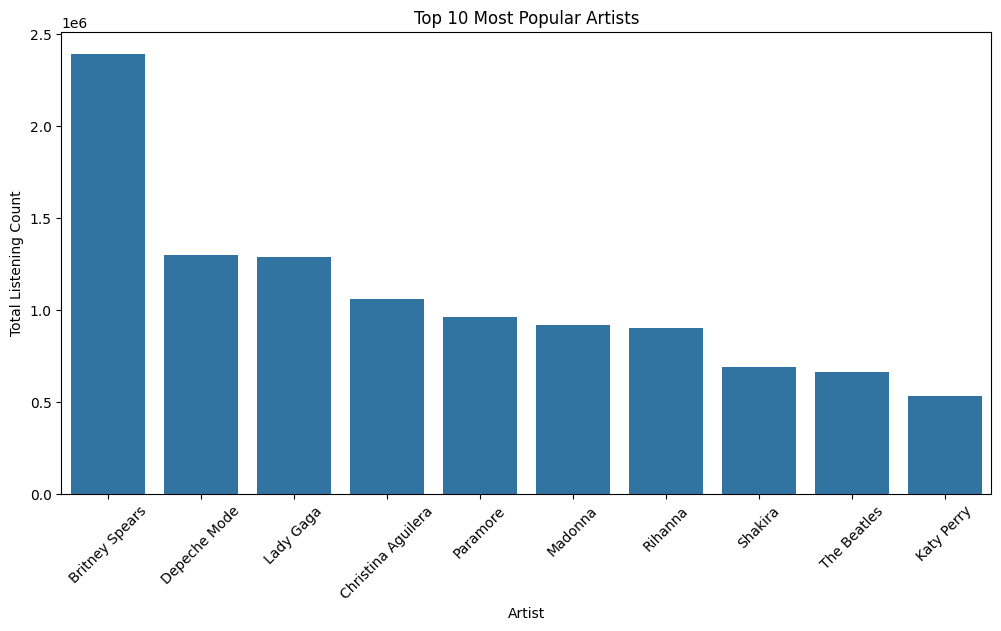

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top 10 Most Active Users
most_active_users = user_data.sort_values(by='total_listening_count', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(data=most_active_users, x='user_name', y='total_listening_count')
plt.title('Top 10 Most Active Users')
plt.xlabel('User')
plt.ylabel('Total Listening Count')
plt.xticks(rotation=45)
plt.show()

# Top 10 Most Popular Artists
most_popular_artists = artist_data.sort_values(by='total_listening_count', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(data=most_popular_artists, x='name', y='total_listening_count')
plt.title('Top 10 Most Popular Artists')
plt.xlabel('Artist')
plt.ylabel('Total Listening Count')
plt.xticks(rotation=45)
plt.show()

Analyze Tag Usage

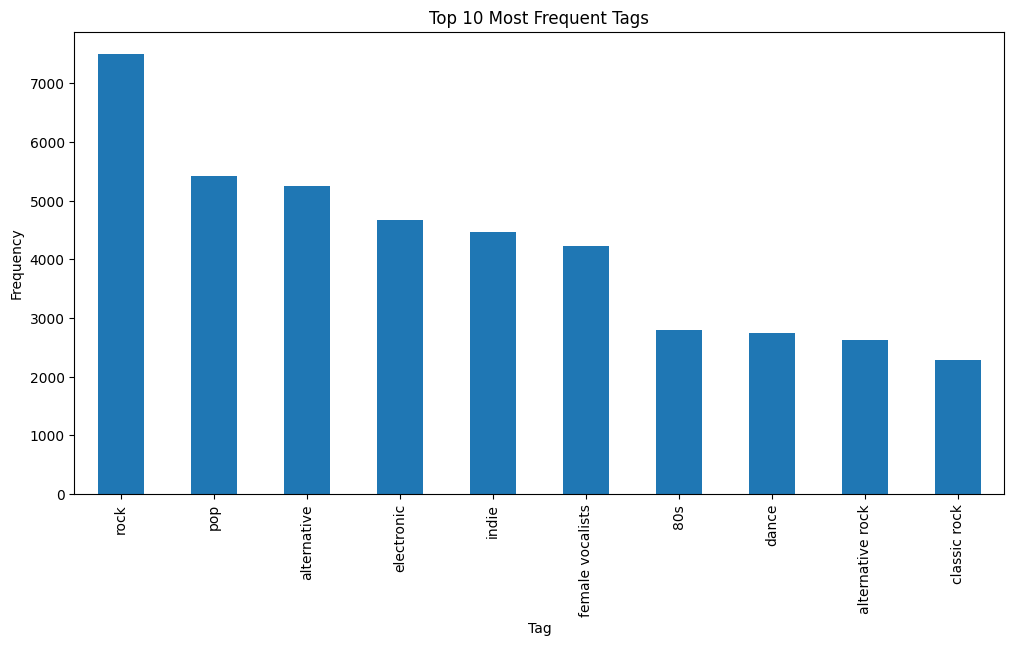

In [68]:
# Most Frequent Tags
most_frequent_tags = user_taggedartists_merged['tagValue'].value_counts().head(10)
plt.figure(figsize=(12, 6))
most_frequent_tags.plot(kind='bar')
plt.title('Top 10 Most Frequent Tags')
plt.xlabel('Tag')
plt.ylabel('Frequency')
plt.show()